In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="whitegrid")


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
df = pd.read_csv(url, compression='gzip')

display(df.head())
df.info()
display(df.describe(include='all'))

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-04-18 22:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


**المهمة A: Overall Descriptive Statistics**

الوسيط = 3257
المتوسط = 3260

الفرق بينهما صغير جدًا، مما يعني أن القيم موزعة تقريبًا بشكل متوازن حول المركز.

بما أن **المتوسط ≈ الوسيط**، فإن توزيع `traffic_volume` شبه متماثل (تقريبًا طبيعي)، ولا يظهر عليه انحراف واضح لا نحو اليمين ولا نحو اليسار.


In [ ]:
# Cell 4 — تنظيف/تحويل الأعمدة المهمة
# تحويل التاريخ إلى نوع datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# نضيف أعمدة مفيدة للتحليل الزماني
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek  # 0=Monday
df['date'] = df['date_time'].dt.date

# تأكد من أعمدة الأمطار/ثلج إذا فيها قيم ناقصة وملئها بصفر إن كان مناسب
for col in ['rain_1h', 'snow_1h']:
    if col in df.columns:
        df[col] = df[col].fillna(0)


In [ ]:
tv = df['traffic_volume']
desc = tv.describe()
mean_tv = tv.mean()
median_tv = tv.median()
mode_tv = tv.mode().iloc[0] if not tv.mode().empty else np.nan
std_tv = tv.std()
range_tv = tv.max() - tv.min()

print("Describe:\n", desc)
print(f"\nMean: {mean_tv:.3f}")
print(f"Median: {median_tv:.3f}")
print(f"Mode: {mode_tv}")
print(f"Std: {std_tv:.3f}")
print(f"Range (max-min): {range_tv}")


Describe:
 count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Mean: 3259.818
Median: 3380.000
Mode: 353
Std: 1986.861
Range (max-min): 7280


In [ ]:
# Cell 6 — skewness و kurtosis
skew_val = tv.skew()
kurt_val = tv.kurtosis()   # pandas uses Fisher definition (normal => 0)
print(f"Skewness: {skew_val:.4f}")
print(f"Kurtosis (excess): {kurt_val:.4f}")


Skewness: -0.0894
Kurtosis (excess): -1.3091


**المهمة B: Skewness and Kurtosis**

قيمة **Skewness**: -0.0894
قيمة **Kurtosis (excess)**: -1.3091

**التفسير:**

قيمة **Skewness** سالبة بشكل طفيف (-0.0894)، مما يشير إلى أن توزيع متغير `traffic_volume` شبه متماثل مع ميل بسيط نحو اليسار. هذا يعني أن هناك عددًا قليلًا من القيم المنخفضة جدًا، بينما تبقى أغلب القيم متمركزة حول المتوسط. هذه النتيجة تتوافق مع ما تم توقعه في المهمة A، حيث كان المتوسط قريبًا من الوسيط مما يدل على توزيع متوازن تقريبًا.

قيمة **Kurtosis** سالبة (-1.3091)، وهذا يعني أن التوزيع **مسطح (Platykurtic)** مقارنة بالتوزيع الطبيعي. أي أن القيم أقل تركّزًا حول المتوسط وذيله أقل سمكًا، مما يشير إلى قلة القيم المتطرفة ووجود عدد أكبر من القيم المتوسطة.

**الاستنتاج:**

توزيع `traffic_volume` قريب من التوزيع الطبيعي، متماثل تقريبًا مع ميل طفيف نحو اليسار، ويُعتبر أكثر تسطحًا من التوزيع الطبيعي.


In [ ]:
# Cell 7 — groupby حسب weather_main (mean, std)
if 'weather_main' in df.columns:
    weather_stats = df.groupby('weather_main')['traffic_volume'].agg(['mean','std','count']).sort_values('mean', ascending=False)
    display(weather_stats)
else:
    print(" weather_main not found ")


,mean,std,count
weather_main,,,
Clouds,3618.449749,1906.202879,15164
Haze,3502.101471,1873.511057,1360
Rain,3317.905501,1982.228705,5672
Drizzle,3290.727073,1997.901830,1821
Smoke,3237.650000,1978.015893,20
Clear,3055.908819,1987.101411,13391
Snow,3016.844228,1900.185883,2876
Thunderstorm,3001.620890,1988.296012,1034
Mist,2932.956639,2073.025670,5950


المهمة C: Multivariate Analysis via Grouping

من خلال النتائج نلاحظ أن أعلى متوسط لقيمة **traffic_volume** سُجل في فئة **Clouds**، مما يشير إلى أن حركة المرور تكون أعلى في الأيام الغائمة مقارنة بباقي الحالات الجوية.

أما أعلى **انحراف معياري (Standard Deviation)** فقد سُجل في فئة **Fog**، مما يدل على أن حركة المرور في الأيام الضبابية تكون أكثر تذبذبًا وتغيرًا، أي أن هناك فروقًا كبيرة بين فترات الذروة وفترات الانخفاض.

**الاستنتاج:**

الطقس **الغائم (Clouds)** يرتبط بأعلى متوسط لحركة المرور،
بينما الطقس **الضبابي (Fog)** يُظهر أكبر تباين في حجم حركة المرور.



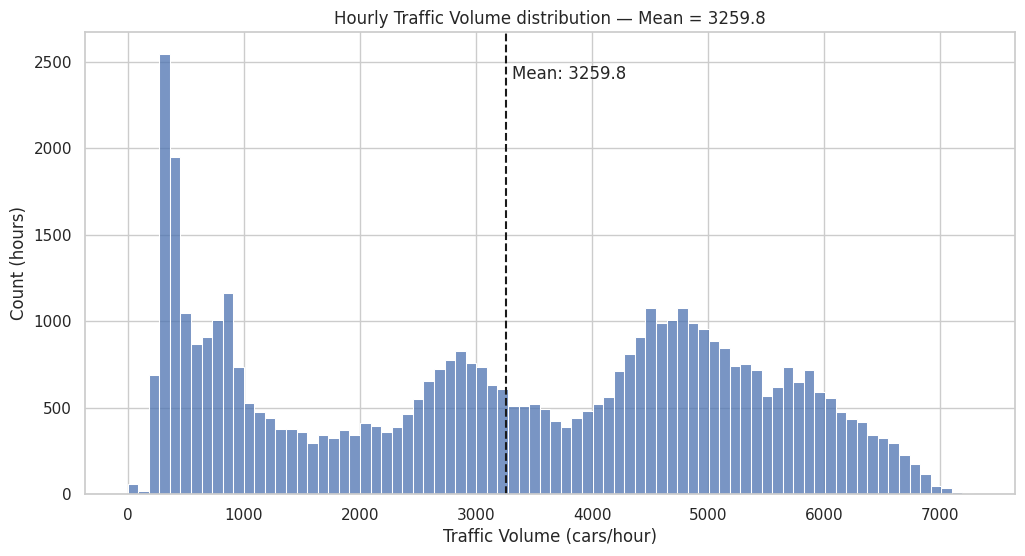

In [ ]:
# Cell 8 — هيستوجرام مع خط المتوسط
plt.figure(figsize=(12,6))
sns.histplot(tv, bins=80, kde=False)
plt.axvline(mean_tv, color='k', linestyle='--', linewidth=1.5)
plt.title(f"Hourly Traffic Volume distribution — Mean = {mean_tv:.1f}")
plt.xlabel("Traffic Volume (cars/hour)")
plt.ylabel("Count (hours)")
plt.annotate(f"Mean: {mean_tv:.1f}", xy=(mean_tv, plt.ylim()[1]*0.9), xytext=(mean_tv+50, plt.ylim()[1]*0.9),
             arrowprops=dict(arrowstyle="->"))
plt.show()


**التحليل:**

يُظهر المدرج التكراري أن توزيع **traffic_volume** متمركز حول القيمة **3260** تقريبًا، حيث تتركز معظم القيم في الوسط وتنخفض تدريجيًا نحو الأطراف.

بما أن القيم موزعة بشكل متوازن تقريبًا حول المتوسط، فإن التوزيع يبدو **شبه متماثل** وليس منحرفًا بشكل واضح.

**الاستنتاج:**
توزيع **traffic_volume** قريب من التوزيع الطبيعي، وهو ما يتوافق مع النتائج السابقة التي أظهرت تقارب المتوسط والوسيط وقيمة **Skewness** القريبة من الصفر.


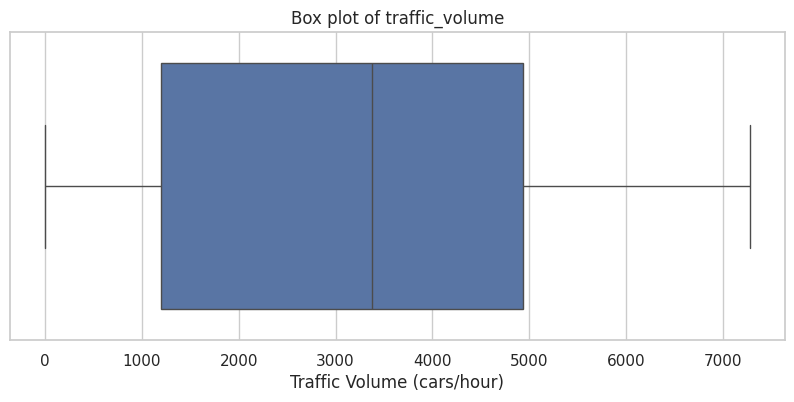

Q1: 1193.0, Q3: 4933.0, IQR: 3740.0


In [ ]:
# Cell 9 — بوكس بلوت للـtraffic_volume
plt.figure(figsize=(10,4))
sns.boxplot(x=tv)
plt.title("Box plot of traffic_volume")
plt.xlabel("Traffic Volume (cars/hour)")
plt.show()

# حساب IQR
Q1 = tv.quantile(0.25)
Q3 = tv.quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")


**Task B: Box Plot for Dispersion**   

> **Q1 = 1193.0**, **Q3 = 4933.0**, **IQR = 3740.0**

**التحليل:**

يمثل **IQR (Interquartile Range)** الفرق بين الربع الثالث **Q3** والربع الأول **Q1**، وهو هنا **3740**.
هذا يعني أن 50٪ من قيم **traffic_volume** تقع بين **1193** و **4933** سيارة في الساعة.

قيمة **IQR** الكبيرة نسبيًا تدل على أن البيانات **تحتوي على تشتت واسع** في القيم الوسطى، أي أن هناك اختلافًا ملحوظًا في حجم حركة المرور بين الساعات المختلفة خلال اليوم.

**الاستنتاج:**
التوزيع يُظهر **تباينًا مرتفعًا** في حجم حركة المرور، ما يشير إلى وجود فترات مزدحمة جدًا وأخرى منخفضة الكثافة، وهو أمر طبيعي في بيانات المرور اليومية.



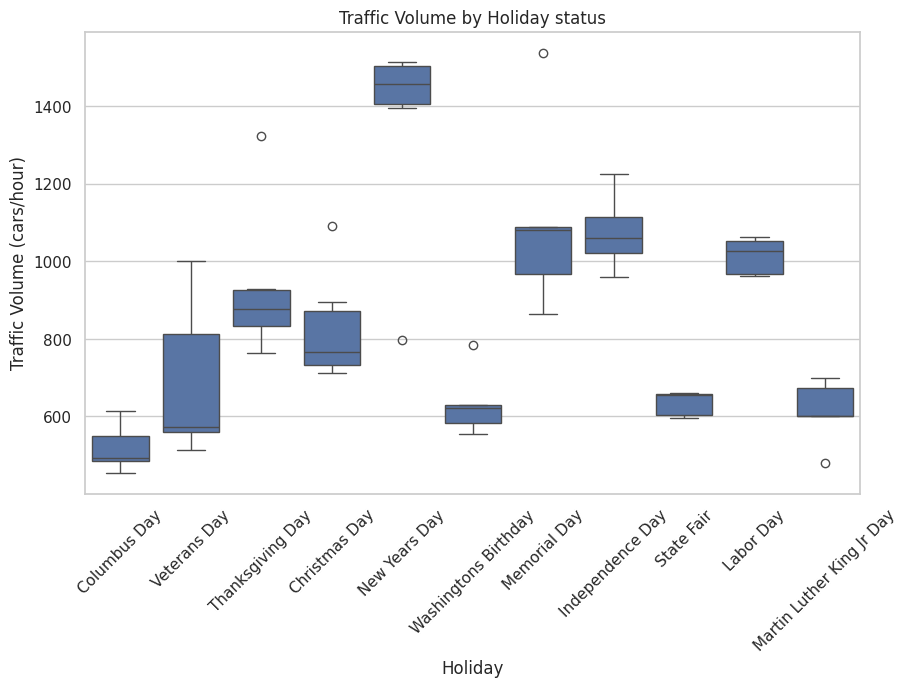

In [ ]:
# Cell 10 — بوكس بلوت مجمّع حسب holiday
if 'holiday' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='holiday', y='traffic_volume', data=df)
    plt.title("Traffic Volume by Holiday status")
    plt.xlabel("Holiday")
    plt.ylabel("Traffic Volume (cars/hour)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("لا يوجد عمود 'holiday' في البيانات.")


,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.130299,0.004714,0.000733,0.067054
temp,0.130299,1.000000,0.009069,-0.019755,-0.101976
rain_1h,0.004714,0.009069,1.000000,-0.000090,0.004818
snow_1h,0.000733,-0.019755,-0.000090,1.000000,0.027931
clouds_all,0.067054,-0.101976,0.004818,0.027931,1.000000


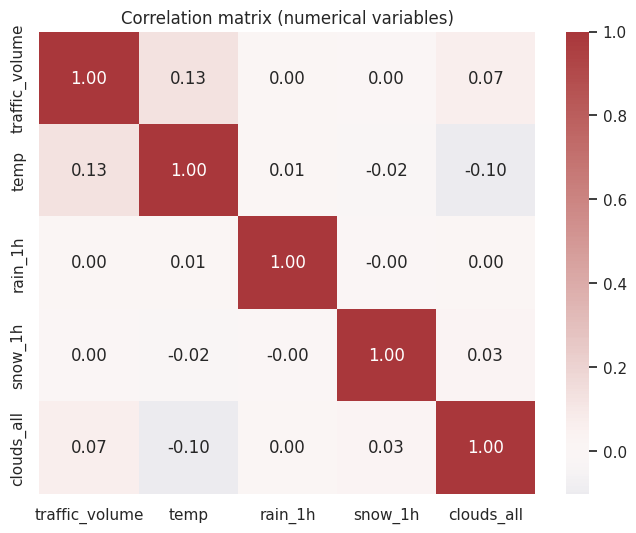

In [ ]:
# Cell 11 — correlation matrix
num_cols = ['traffic_volume','temp','rain_1h','snow_1h','clouds_all']
existing_num_cols = [c for c in num_cols if c in df.columns]
corr_mat = df[existing_num_cols].corr()
display(corr_mat)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Correlation matrix (numerical variables)")
plt.show()



 Task B: Interpretation and Paradox

 تحليل الارتباط (Correlation Analysis)

تشير نتائج تحليل **Pearson correlation coefficients** بين `traffic_volume` والمتغيرات البيئية إلى أن **درجة الحرارة (`temp`) تمتلك أقوى ارتباط مطلق**، حيث يبلغ معامل الارتباط تقريبًا 0.13. العلاقة **positive**، ما يعني أنه بشكل عام، كلما ارتفعت درجة الحرارة، زادت حركة المرور بشكل طفيف. أما المتغيرات البيئية الأخرى (`rain_1h`, `snow_1h`, `clouds_all`) فتبدي ارتباطات ضئيلة جدًا مع حركة المرور.

 العلاقة السببية و Simpson’s Paradox

على الرغم من الارتباط الملحوظ، **Correlation ≠ Causation**. قد تخفي البيانات المجمعة تأثير **confounding variables**، وهو ما يوضحه **Simpson’s Paradox**. من الممكن أن تكون عوامل مثل **time of day**، **day of the week**، أو **local socio-economic events** هي السبب الحقيقي الذي يؤثر على كل من درجة الحرارة وحركة المرور. لذلك، الارتباط بين درجة الحرارة وحركة المرور قد يكون **spurious** وليس علاقة سببية مباشرة.

**الخلاصة:** الاعتماد على مقاييس الارتباط وحدها غير كافٍ لاستنتاج العلاقات السببية. يجب أخذ **confounding variables** بعين الاعتبار لضمان تفسير علمي دقيق للبيانات الرصدية.

